In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
resbetaUni = np.mean(np.load('betaUni.npy'), axis = 0)
resbeta = np.mean(np.load('beta.npy'), axis = 0)
resbetaDet = np.mean(np.load('betaDet.npy'), axis = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'betaUni.npy'

In [3]:
def mv(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

Text(0.5,1,'fix_start')

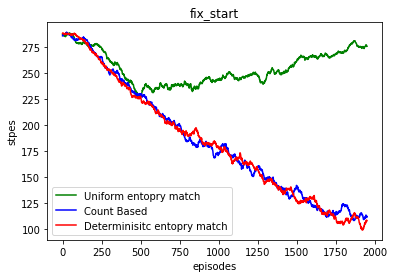

In [19]:
plt.plot(mv(resbetaUni, 50), color = 'green', label = 'Uniform entopry match')
plt.plot(mv(resbeta, 50), color = 'blue', label = 'Count Based')
plt.plot(mv(resbetaDet, 50), color = 'red', label = 'Determinisitc entopry match')
plt.legend()
plt.xlabel('episodes')
plt.ylabel('stpes')
plt.title('fix_start')

In [4]:
 def get_dir(dictionary, trial, sample):
    string = "/home/ramtin/Desktop/CRL/gridworld/results/"
    for key in dictionary.keys():
        string += "{}_{}/".format(key, dictionary[key])
    string += "results_"
    straing_entropy = string + 'entopy_trail_{}_sample_{}.npy'.format(trial, sample)
    string_count = string + 'count_trail_{}_sample_{}.npy'.format(trial, sample)
    string_map = string + 'map_sample_{}.npy'.format(sample)
    string_res = string + 'results.npy'
    return straing_entropy, string_count, string_map, string_res

In [3]:
def infer(args, sample):
    to_int = {'#': 0, ' ':1, 's': 2, 'g': 3, '0': 4}
    to_symbol = {v: k for k, v in to_int.items()}
    
    entropy, count, map_string, res_string = get_dir(args, 0, sample)
    # Load map file:
    map_file = np.load(map_string)
    annon = map_file.reshape(13,13)[1:-1,1:-1]
    
    # Laod Result file:
    res_file = np.mean(np.mean(np.load(res_string), axis = 1), axis = 0)
    plt.plot(mv(res_file, 50), color = 'green')
    
    #for different trials:
    Count = np.load(entropy)
    Entropy = np.load(entropy)

    for n in range(args['n_trial']):
        entropy, count, _, _ = get_dir(args, n, sample)
        entropy = np.load(entropy)
        count = np.load(count)
        Entropy += entropy
        Count += count
    
    # Plotting
    plt.figure(figsize=(5,5))
    plt.imshow(np.mean(Entropy/args['n_trial'], axis = 1).reshape(13,13)[1:-1,2:-1])
    plt.colorbar()
    for i in range(11):
        for j in range(11):
            text = plt.text(j, i, to_symbol[annon[i, j]],
                           ha="center", va="center", color="w")
    plt.title('entropy' + 'Entropy: {}'.format(bool(args['entropy'])))
    
    # Plotting
    plt.figure(figsize=(5,5))
    plt.imshow(np.sum(Count, axis = 1).reshape(13,13)[1:-1,2:-1])
    plt.colorbar()
    for i in range(11):
        for j in range(11):
            text = plt.text(j, i, to_symbol[annon[i, j]],
                           ha="center", va="center", color="w")
    plt.title('Count ' + 'Entropy: {}'.format(bool(args['entropy'])))
    return res_file

In [4]:
args = {'entropy':1, 'random':0.4, 'n_trial':10, 'n_sample':1,\
       'max_ep': 2000, 'max_step': 1000}
res_entropy = infer(args, 0)

NameError: name 'get_dir' is not defined

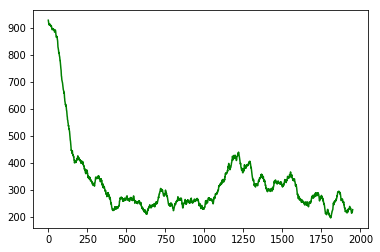

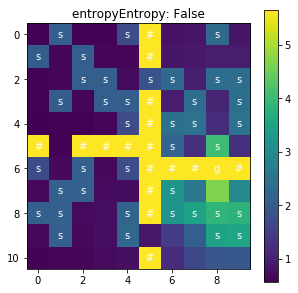

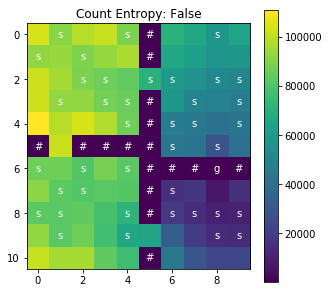

In [163]:
args = {'entropy':0, 'random':0.4, 'n_trial':10, 'n_sample':1,\
       'max_ep': 2000, 'max_step': 1000}
res_no_ent = infer(args, 0)

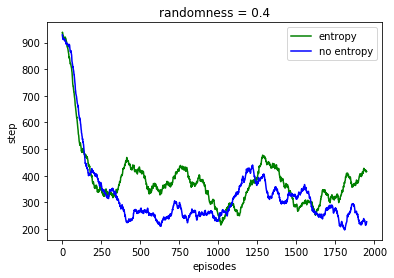

In [158]:
plt.plot(mv(res_entropy, 50), color='green', label='entropy')
plt.plot(mv(res_no_ent, 50), color='blue', label='no entropy')
plt.xlabel('episodes')
plt.ylabel('step')
plt.title('randomness = 0.4')
plt.legend()

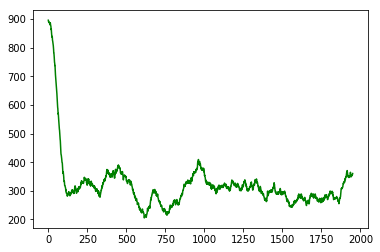

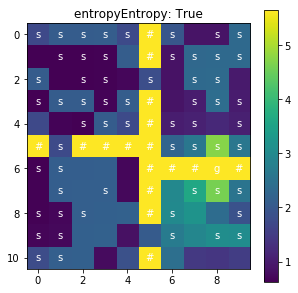

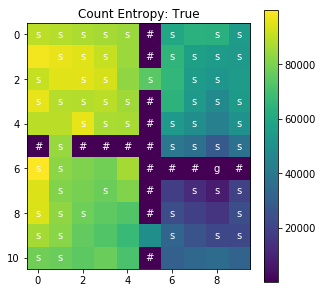

In [168]:
args = {'entropy':1, 'random':0.6, 'n_trial':10, 'n_sample':1,\
       'max_ep': 2000, 'max_step': 1000}
res_entropy = infer(args, 0)

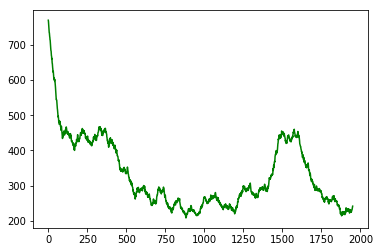

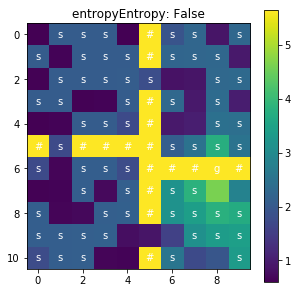

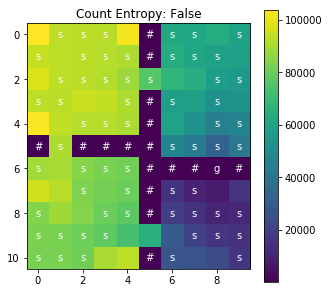

In [169]:
args = {'entropy':0, 'random':0.6, 'n_trial':10, 'n_sample':1,\
       'max_ep': 2000, 'max_step': 1000}
res_no_ent = infer(args, 0)

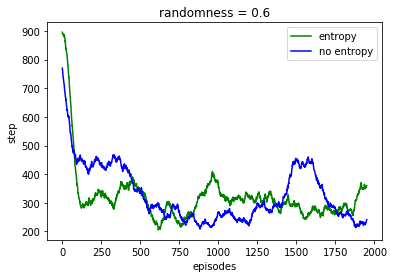

In [171]:
plt.plot(mv(res_entropy, 50), color='green', label='entropy')
plt.plot(mv(res_no_ent, 50), color='blue', label='no entropy')
plt.xlabel('episodes')
plt.ylabel('step')
plt.title('randomness = 0.6')
plt.legend()

#### DO and DH

In [5]:
args = {'method':'DH', 'ent_known':0, 'random':0, 'map_name':'maps/map_fourroom_exp1.txt',\
        'n_trial':100, 'n_sample':1, 'max_ep':2000, 'max_step':500, 'beta':5.0}

In [16]:
def get_dir(dictionary, trial, sample):
    string = "/Users/ramtin/Desktop/Stanford/Fall 2018/CRL/crl/gridworld/results/"
    for key in dictionary.keys():
        string += "{}_{}/".format(key, dictionary[key])
    string += "results_"
    straing_entropy = string + 'entopy_trail_{}_sample_{}.npy'.format(trial, sample)
    string_count = string + 'count_trail_{}_sample_{}.npy'.format(trial, sample)
    string_map = string + 'map_sample_{}.npy'.format(sample)
    string_res = string + 'results.npy'
    return straing_entropy, string_count, string_map, string_res

In [93]:

    
    entropy, count, map_string, res_string = get_dir(args, 0, 0)
    # Load map file:
    map_file = np.load(map_string)
    annon = map_file.reshape(13,13)[1:-1,1:-1]
    
    # Laod Result file:
    plt.plot(mv(res_file, 10), color = 'green')
    
    #for different trials:
    Count = np.load(count)
    #Entropy = np.load(entropy)

    for n in range(args['n_trial']):
        entropy, count, _, _ = get_dir(args, n, sample)
        #entropy = np.load(entropy)
        count = np.load(count)
        #Entropy += entropy
        Count += count
    #Entropy /= args['n_trial']
    Count /= np.sum(Count)
    
    # Plotting
    #plt.figure(figsize=(5,5))
    #plt.imshow(np.mean(Entropy/args['n_trial'], axis = 1).reshape(13,13)[1:-1,2:-1])
    #plt.colorbar()
    #for i in range(11):
    #    for j in range(11):
    #        text = plt.text(j, i, to_symbol[annon[i, j]],
    #                       ha="center", va="center", color="w")
    #plt.title('entropy' + 'Entropy: {}'.format(bool(args['entropy'])))
    
    # Plotting
    plt.figure(figsize=(5,5))
    plt.imshow(np.sum(Count[, axis = 1).reshape(13,13)[1:-1,1:-1])
    plt.colorbar()
    for i in range(11):
        for j in range(11):
            text = plt.text(j, i, to_symbol[annon[i, j]],
                           ha="center", va="center", color="w")
    #plt.title('Count ' + 'Entropy: {}'.format(bool(args['entropy'])))
    return res_file

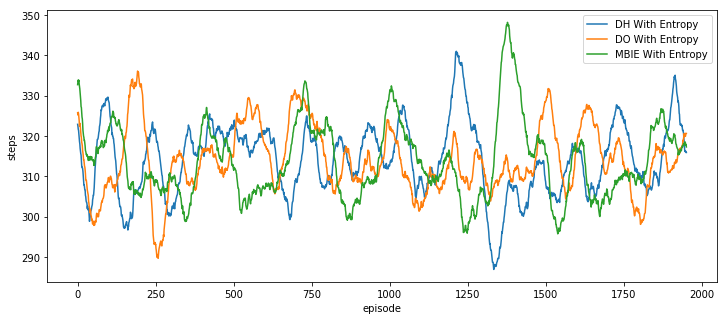

In [111]:
args = {'method':'DH', 'ent_known':1, 'random':0, 'map_name':'maps/map_fourroom_exp1.txt',\
        'n_trial':100, 'n_sample':1, 'max_ep':2000, 'max_step':500, 'beta':5.0}
plt.figure(figsize=(12,5))
for methods in ['DH', 'DO', 'MBIE']:
    if methods == 'MBIE':
        args['beta'] = 0.2
    else:
        args['beta'] = 5.0
    args['method'] = methods
    _, _, _, res_string = get_dir(args, 0, 0)
    res_file = np.mean(np.mean(np.load(res_string), axis = 1), axis = 0)
    plt.plot(mv(res_file, 50), label=methods + ' With Entropy')
plt.legend()
plt.xlabel('episode');
plt.ylabel('steps');

In [46]:
def plot_res(args, beta, method):
    for methods in method:
        plt.figure(figsize=(12,5))
        for entropy in [1, 0]:
            if methods in ['MBIE', 'MBIE_NS']:
                args['beta'] = 1/beta
                args['ent_known']=0
            else:
                args['beta'] = beta
                args['ent_known']=entropy
            args['method'] = methods
            _, _, _, res_string = get_dir(args, 0, 0)
            res_file = np.mean(np.mean(np.load(res_string), axis = 1), axis = 0)
            plt.plot(mv(res_file, 50), label=methods +\
                     ' Entropy Known = {}'.format(bool(entropy)))
        plt.legend()
        plt.xlabel('episode');
        plt.ylabel('steps');

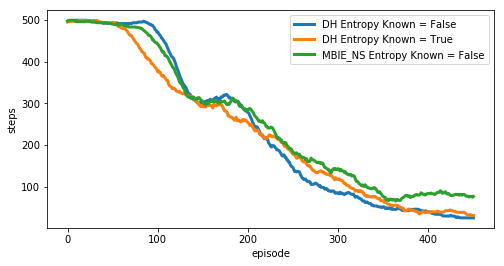

In [119]:
args = {'max_step':500, 'max_ep':500, 'n_sample':1, 'random':0, 'n_trial':5, \
        'beta':50, 'map_name':'maps/map_fourroom_exp1.txt','method':'DO', 'ent_known':1} 
beta = 50.0
plt.figure(figsize=(8,4))
for methods in ['DH', 'MBIE_NS']:
    for entropy in [0, 1]:
        if methods in ['MBIE', 'MBIE_NS']:
            args['beta'] = 0.1
            args['ent_known']=0
            if entropy == 1:
                continue
        else:
            args['beta'] = beta
            args['ent_known']=entropy
        args['method'] = methods
        _, _, _, res_string = get_dir(args, 0, 0)
        res_file = np.mean(np.mean(np.load(res_string), axis = 1), axis = 0)
        plt.plot(mv(res_file, 50), label=methods +\
                 ' Entropy Known = {}'.format(bool(entropy)), linewidth = 3)
    plt.legend()
    plt.xlabel('episode');
    plt.ylabel('steps');

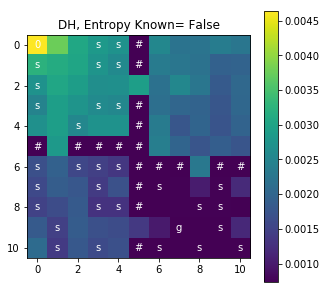

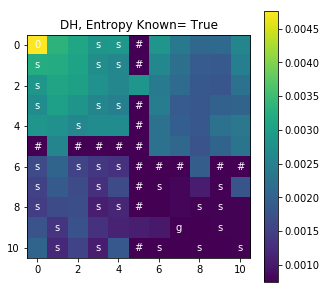

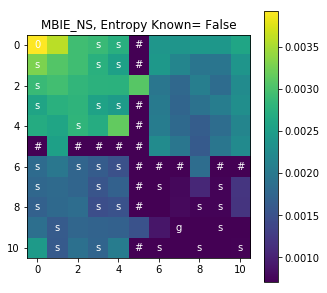

In [120]:
plot_counts(args = {'max_step':500, 'max_ep':500, 'n_sample':1, 'random':0, 'n_trial':5, \
        'beta':50, 'map_name':'maps/map_fourroom_exp1.txt','method':'DH', 'ent_known':0}, method=['DH', 'MBIE_NS'])

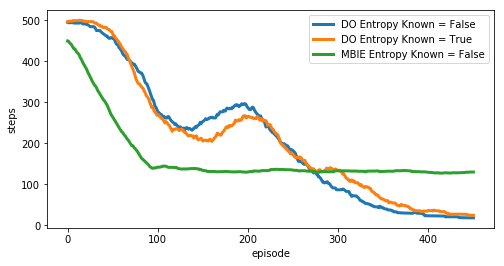

In [122]:
args = {'max_step':500, 'max_ep':500, 'n_sample':1, 'random':0, 'n_trial':5, \
        'beta':50, 'map_name':'maps/map_fourroom_exp1.txt','method':'DO', 'ent_known':1} 
beta = 50.0
plt.figure(figsize=(8,4))
for methods in ['DO', 'MBIE']:
    for entropy in [0, 1]:
        if methods in ['MBIE', 'MBIE_NS']:
            args['beta'] = 0.1
            args['ent_known']=0
            if entropy == 1:
                continue
        else:
            args['beta'] = beta
            args['ent_known']=entropy
        args['method'] = methods
        _, _, _, res_string = get_dir(args, 0, 0)
        res_file = np.mean(np.mean(np.load(res_string), axis = 1), axis = 0)
        plt.plot(mv(res_file, 50), label=methods +\
                 ' Entropy Known = {}'.format(bool(entropy)), linewidth = 3)
    plt.legend()
    plt.xlabel('episode');
    plt.ylabel('steps');

In [123]:
args = {'max_step':500, 'max_ep':500, 'n_sample':1, 'random':0, 'n_trial':5, \
        'beta':50, 'map_name':'maps/map_fourroom_exp1.txt','method':'DO', 'ent_known':1} 
beta = 50.0
plt.figure(figsize=(8,4))
methods = 'DO'
entropy = 1
for beta in [10, 50, 100]:
    args['beta'] = beta
    args['ent_known']=entropy
    args['method'] = methods
    _, _, _, res_string = get_dir(args, 0, 0)
    res_file = np.mean(np.mean(np.load(res_string), axis = 1), axis = 0)
    plt.plot(mv(res_file, 50), label=methods +\
                ' Beta = {}'.format(beta), linewidth = 3)
plt.legend()
plt.xlabel('episode');
plt.ylabel('steps');

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ramtin/Desktop/Stanford/Fall 2018/CRL/crl/gridworld/results/max_step_500/max_ep_500/n_sample_1/random_0/n_trial_5/beta_10/map_name_maps/map_fourroom_exp1.txt/method_DO/ent_known_1/results_results.npy'

Lesson:
Optimism Bonus is so High we cannot see the difference, none of them has converged.

#### Counts

In [118]:
def plot_counts(args, method):
    to_int = {'#': 0, ' ':1, 's': 2, 'g': 3, '0': 4}
    to_symbol = {v: k for k, v in to_int.items()}

    for methods in method:
        plt.figure(figsize=(12,5))
        for entropy in [0, 1]:
            if methods in ['MBIE', 'MBIE_NS']:
                args['beta'] = 0.1
                args['ent_known']=0
                if entropy == 1:
                    continue
            else:
                args['beta'] = 50.0
                args['ent_known']=entropy
            args['method'] = methods
            _, count, map_string, res_string = get_dir(args, 0, 0)
                # Load map file:
            map_file = np.load(map_string)
            annon = map_file.reshape(13,13)[1:-1,1:-1]

            #for different trials:
            Count = np.load(count)

            #for n in range(args['n_trial']):
            #    _, count, _, _ = get_dir(args, n, 0)
            #    count = np.load(count)
            #    Count += count
            Count /= np.sum(Count)

            # Plotting
            plt.figure(figsize=(5,5))
            if methods in ['DH', 'MBIE_NS']:
                Count = np.sum(Count, axis = 1)
            plt.imshow(np.mean(Count, axis = 1).reshape(13,13)[1:-1,1:-1])
            plt.colorbar()
            for i in range(11):
                for j in range(11):
                    text = plt.text(j, i, to_symbol[annon[i, j]],
                                  ha="center", va="center", color="w")  
            plt.title('{}, Entropy Known= {}'.format(methods, bool(entropy)))

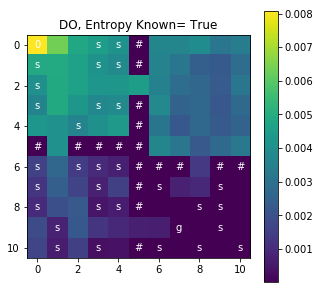

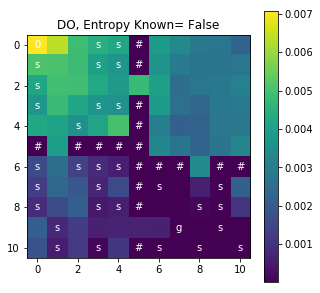

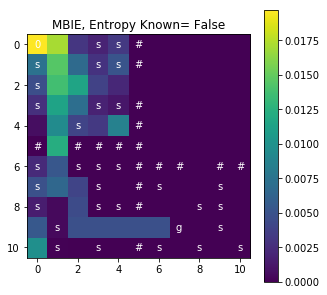

In [105]:
plot_counts(args = {'max_step':500, 'max_ep':500, 'n_sample':1, 'random':0, 'n_trial':5, \
        'beta':50, 'map_name':'maps/map_fourroom_exp1.txt','method':'DO', 'ent_known':1})

### Beta = 10

FileNotFoundError: [Errno 2] No such file or directory: '/home/ramtin/Desktop/CRL/gridworld/results/method_DH/ent_known_1/random_0/map_name_maps/map_fourroom_exp1.txt/n_trial_2/n_sample_1/max_ep_2000/max_step_2000/beta_1000.0/results_results.npy'

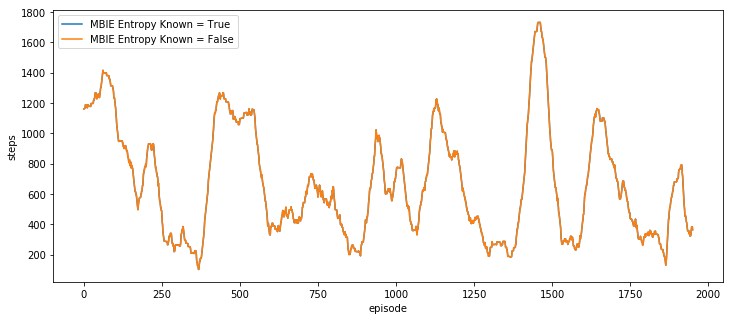

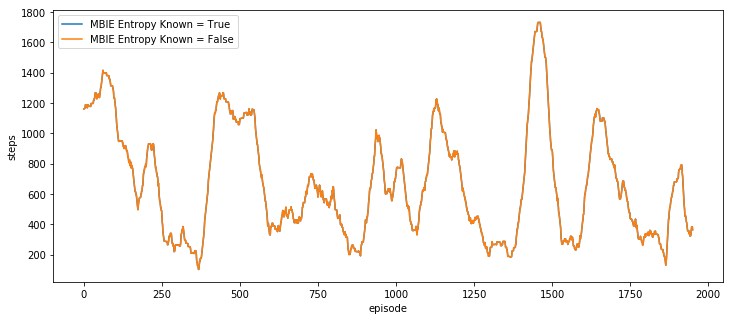

<Figure size 864x360 with 0 Axes>

In [150]:
args = {'method':'DO', 'ent_known':1, 'random':0, 'map_name':'maps/map_fourroom_exp1.txt',\
        'n_trial':2, 'n_sample':1, 'max_ep':2000, 'max_step':2000, 'beta':5.0}
plot_res(args, beta=1000.0)